# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(find_dotenv())

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price and format data as JSON
btc_url = requests.get(btc_url)
btc_json = btc_url.json()

# Use json.dumps with argument indent=4 to format data
json.dumps(btc_json, indent=4)

btc_price = btc_json["data"]["1"]["quotes"]["CAD"]["price"]
btc_price

49635.7268

In [6]:
# Fetch current ETH price and format data as JSON
eth_url = requests.get(eth_url)
eth_json = eth_url.json()

# Use json.dumps with argument indent=4 to format data
json.dumps(eth_json, indent=4)

eth_price = eth_json["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

3180.081698

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59562.87
The current value of your 5.3 ETH is $16854.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-06-09 00:00:00-04:00  115.43  115.43  114.9700  115.05  3418086  423.18   
2021-06-10 00:00:00-04:00  115.30  115.31  114.8605  115.30  3665931  422.96   
2021-06-11 00:00:00-04:00  115.31  115.32  115.1600  115.24  3470062  424.19   
2021-06-14 00:00:00-04:00  115.18  115.18  114.9350  114.97  2999623  424.43   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598  
2021-06-10 00:00:00-04:00  424.63  421.55  423.58  43574416  
2021-06-11 00:00:00-04:00  424.42  422.82  424.32  37014839  
2021-06-14 00:00:00-04:00  425.29  423.10  425.29  33128340

In [11]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker["AGG"]["close"][-1]
spy_close_price = df_ticker["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.97
Current SPY closing price: $425.29


In [12]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price*my_agg
my_spy_value = spy_close_price*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21264.50
The current value of your 200 AGG shares is $22994.00


### Savings Health Analysis

In [13]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value+my_eth_value
shares = my_agg_value+my_spy_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(index = ["crypto", "shares"])
df_savings["amount"] = [crypto, shares]

# Display savings Da=taFrame
display(df_savings)

,amount
crypto,76417.305159
shares,44258.500000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

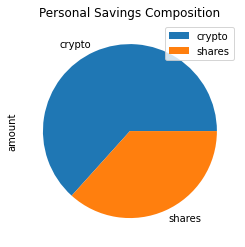

In [14]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings["amount"].sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund, currently valued at ${total_savings:.2f}.")
elif total_savings == emergency_fund:
    print("Congratulations! You reached your financial goal.")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings):.2f} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund, currently valued at $120675.81.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-06-09', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2019-06-09', tz='America/New_York').isoformat()
start_date2 = pd.Timestamp('2019-06-10', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df

# Display sample data
df_stock_data1.isnull().sum()
df_stock_data1 = df_stock_data1.dropna()

In [18]:
# Get remaining years worth of historical data for SPY and AGG because limit is exceeded.
df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date2,
    limit=1000
).df

df_stock_data2.isnull().sum()
df_stock_data2 = df_stock_data2.dropna()

In [19]:
# Concatenate both dataframes to get 5 years worth of historical data.
combined_df = pd.concat(
    [df_stock_data1, df_stock_data2], axis=0, join="inner"
)

combined_df

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-06-09 00:00:00-04:00  111.50  111.5000  111.3631  111.380  1390332   
2016-06-10 00:00:00-04:00  111.54  111.6575  111.4500  111.505  1205373   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.5300  111.610  1521542   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713   
...                           ...       ...       ...      ...      ...   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-06-09 00:00:00-04:00  211.51  212.22  211.1900  212.01   54695399  
2016-06-10 00:00:00-04:00  210.46  210.86  209.4300  210.06   80491207  
2016-06-13 00:00:00-04:00  209.36  210.37  208.3500  208.44   82156781  
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
...                           ...     ...       ...     ...        ...  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27   40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62   38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58   43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31   37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29   33128340  

[1262 rows x 10 columns]

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = combined_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-06-09 00:00:00-04:00  111.50  111.5000  111.3631  111.380  1390332   
2016-06-10 00:00:00-04:00  111.54  111.6575  111.4500  111.505  1205373   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.5300  111.610  1521542   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713   
...                           ...       ...       ...      ...      ...   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2016-06-09 00:00:00-04:00          NaN  211.51  212.22  211.1900  212.01   
2016-06-10 00:00:00-04:00     0.001122  210.46  210.86  209.4300  210.06   
2016-06-13 00:00:00-04:00     0.000942  209.36  210.37  208.3500  208.44   
2016-06-14 00:00:00-04:00    -0.000493  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
...                                ...     ...     ...       ...     ...   
2021-06-08 00:00:00-04:00     0.001963  423.11  423.21  420.3200  422.27   
2021-06-09 00:00:00-04:00     0.002003  423.18  423.26  421.4100  421.62   
2021-06-10 00:00:00-04:00     0.002173  422.96  424.63  421.5500  423.58   
2021-06-11 00:00:00-04:00    -0.000520  424.19  424.42  422.8200  424.31   
2021-06-14 00:00:00-04:00    -0.002343  424.43  425.29  423.1000  425.29   

                                                   
                              volume daily_return  
time                                               
2016-06-09 00:00:00-04:00   54695399          NaN  
2016-06-10 00:00:00-04:00   80491207    -0.009198  
2016-06-13 00:00:00-04:00   82156781    -0.007712  
2016-06-14 00:00:00-04:00  102129228    -0.001727  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
...                              ...          ...  
2021-06-08 00:00:00-04:00   40131441     0.000095  
2021-06-09 00:00:00-04:00   38368598    -0.001539  
2021-06-10 00:00:00-04:00   43577329     0.004649  
2021-06-11 00:00:00-04:00   37018077     0.001723  
2021-06-14 00:00:00-04:00   33128340     0.002310  

[1262 rows x 12 columns]

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003755,1.009479,0.997303,0.988723,0.999226,0.987368,1.012467,0.996499,1.010338,0.988890,...,1.009701,0.993968,0.996333,1.009377,1.011109,0.999014,0.997864,1.002523,0.983769,0.987332
2,0.996763,1.004658,1.000797,0.985636,1.002289,0.982553,1.010209,1.010818,1.019767,0.982865,...,1.010507,0.995578,0.999001,1.012852,1.006639,0.990193,0.987956,0.997050,0.988586,0.994496
3,1.004527,1.022114,0.995933,0.983686,1.005060,0.979711,1.022627,0.999816,1.015188,0.970524,...,1.014163,1.005165,0.999039,1.018180,1.003444,0.987133,0.979385,1.007533,0.986508,0.997661
4,1.003768,1.021268,1.000749,1.001726,1.012890,0.990448,1.017056,1.014845,1.008583,0.973902,...,1.024950,0.999704,1.009406,1.023771,0.993032,0.992414,0.979753,0.992986,0.997966,0.998283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.490727,28.690178,16.085768,11.293296,19.508202,24.077664,20.581012,30.525782,10.024750,13.937453,...,15.242325,47.744493,25.301386,9.564851,47.359376,20.354015,15.241293,19.638625,10.223283,41.843329
7557,26.638959,28.827238,16.154433,11.142983,19.510309,23.695952,20.550842,30.548052,10.046012,13.920541,...,15.169458,47.454192,25.359365,9.581285,47.145361,20.246558,15.074545,19.546822,10.179653,42.266770
7558,26.829520,29.275219,16.133277,11.120283,19.452320,23.352905,20.431024,30.840525,10.023358,13.864647,...,15.204969,47.258429,25.510160,9.558636,46.877212,20.224651,15.021629,19.693071,10.100155,42.521161
7559,26.742257,29.110450,16.043414,11.129568,19.469296,23.321786,20.569316,30.858724,10.145659,13.935802,...,15.223233,47.626083,25.127157,9.479971,47.180989,20.294772,15.258141,19.390562,10.015124,42.794706


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

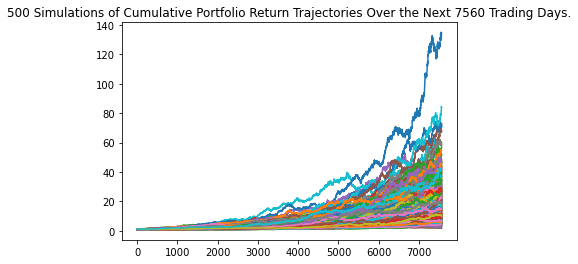

In [23]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_even_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

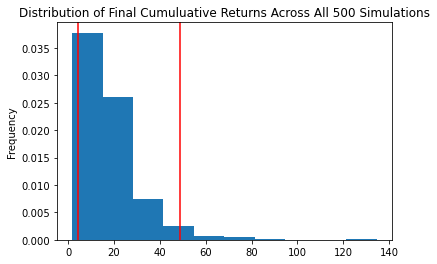

In [24]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_even_dist.plot_distribution()

In [25]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000497,1.000148,0.981240,1.021371
2,1.000663,1.000334,0.966889,1.037052
3,1.000829,1.000217,0.965873,1.046478
4,1.001117,1.000158,0.965436,1.050893


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Portfolio Over the Next 30 Years'}>

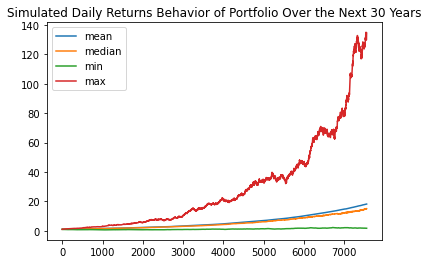

In [26]:
# Visually analyze the trajectory of the portfolio daily returns on the next 30 years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Portfolio Over the Next 30 Years")

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             18.177514
std              13.017572
min               1.708665
25%               9.710064
50%              14.976927
75%              23.011530
max             134.525137
95% CI Lower      4.467101
95% CI Upper     48.633210
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 the portfolio over the next 30 years will end within in the range of $89342.02 and $972664.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134013.03 and $1458996.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with a higher stock than bond ratio
# YOUR CODE HERE!
MC_five_year_sim = MCSimulation(
    portfolio_data = combined_df,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997534,0.993598,0.998813,1.009981,0.995315,1.006713,0.986037,1.002373,1.004524,0.999031,...,0.990858,0.998903,0.983396,1.008998,0.989067,0.997323,1.005113,0.990034,1.003674,1.015592
2,1.001530,0.987690,1.008525,1.008234,0.983748,0.991663,0.986924,1.005504,0.995185,1.002217,...,1.000230,1.000481,0.977456,1.019506,0.989518,1.011780,1.016059,0.979872,0.992106,1.005830
3,0.996516,0.984882,1.002756,1.019007,0.993372,0.974227,1.005699,0.996670,0.975596,1.000279,...,0.995613,1.003898,0.988238,1.020934,0.991880,1.002713,1.010474,0.981629,0.996815,1.007171
4,0.994967,1.001232,1.005235,1.017592,1.004422,0.970210,1.005479,0.995839,0.986425,1.001255,...,0.988719,1.002212,0.984741,1.022626,1.000692,1.002543,1.042284,0.980216,1.008896,1.003168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.997622,1.891538,1.024077,2.370916,2.489834,1.196767,0.834698,1.529176,1.243009,1.341061,...,1.925147,1.810863,1.744530,2.957374,1.725946,1.101836,1.459757,2.051840,0.655643,1.408515
1257,1.996250,1.916363,1.023134,2.374427,2.449606,1.184549,0.849979,1.553221,1.239585,1.334373,...,1.944003,1.820884,1.764840,2.964769,1.716453,1.100578,1.462016,2.072953,0.654302,1.407262
1258,1.985349,1.929507,1.023573,2.371880,2.442272,1.197804,0.863350,1.565225,1.258318,1.343776,...,1.945124,1.819630,1.765806,2.940070,1.730467,1.085779,1.459436,2.065441,0.653632,1.395286
1259,1.982304,1.918425,1.030904,2.368743,2.466430,1.190813,0.867820,1.581063,1.250704,1.322687,...,1.957751,1.854882,1.787416,2.957977,1.718464,1.074323,1.460073,2.080601,0.657844,1.381268


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

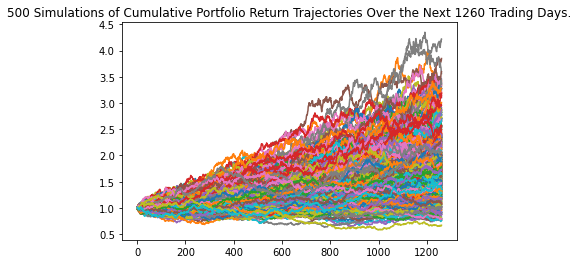

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_year_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

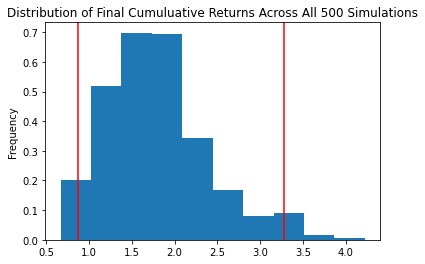

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_year_sim.plot_distribution()

In [34]:
# Compute summary statistics from the simulated daily returns
simulated_returns_five = {
    "mean": list(MC_five_year_sim.simulated_return.mean(axis=1)),
    "median": list(MC_five_year_sim.simulated_return.median(axis=1)),
    "min": list(MC_five_year_sim.simulated_return.min(axis=1)),
    "max": list(MC_five_year_sim.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_five = pd.DataFrame(simulated_returns_five)

# Display data
df_simulated_returns_five.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999936,0.999914,0.977223,1.021442
2,1.000536,1.000002,0.960458,1.034907
3,1.000668,1.000646,0.956094,1.044452
4,1.000501,1.000000,0.937718,1.057729


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Portfolio Over the Next 5 Years'}>

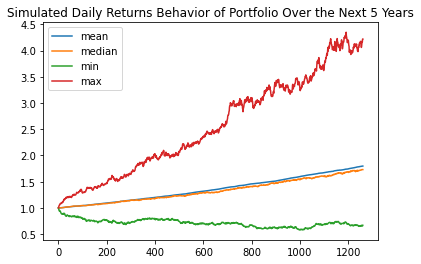

In [35]:
df_simulated_returns_five.plot(title="Simulated Daily Returns Behavior of Portfolio Over the Next 5 Years")

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_year_tbl = MC_five_year_sim.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(five_year_tbl)

count           500.000000
mean              1.797174
std               0.593352
min               0.668647
25%               1.374100
50%               1.729943
75%               2.086296
max               4.220214
95% CI Lower      0.874944
95% CI Upper      3.280510
Name: 1260, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(five_year_tbl[8]*initial_investment_five,2)
ci_upper_five = round(five_year_tbl[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52496.65 and $196830.57


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year_sim = MCSimulation(
    portfolio_data = combined_df,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005861,1.011589,1.003279,0.998747,0.992806,0.996753,1.005345,0.987820,0.989524,0.988845,...,0.994539,1.011476,1.003237,0.986979,1.023737,1.000457,0.997716,0.996686,1.016852,0.988666
2,1.009414,1.018156,1.006947,1.014828,0.990521,1.000445,1.010053,1.010030,0.995079,0.988647,...,1.001471,1.005286,1.005383,1.002728,1.017105,0.998777,0.997337,0.995574,1.009674,0.966473
3,1.021420,1.022461,1.005360,1.004848,0.980562,0.996427,1.012398,1.024030,0.993162,0.983680,...,0.992213,1.000671,1.010158,0.994653,1.021563,1.007416,1.002345,0.987629,0.993502,0.969738
4,1.022048,1.016347,1.011457,0.995756,0.979559,0.994296,1.001426,1.027039,0.977933,0.994757,...,1.001537,1.010734,1.009742,0.991737,1.007273,1.006571,1.002422,0.975263,0.998763,0.965101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.025367,2.696132,2.898726,3.875554,2.909856,7.291914,1.061028,2.777129,2.370482,2.853527,...,2.196304,3.114090,9.210592,2.226944,2.116072,3.782700,1.953404,2.283945,3.505527,2.418056
2517,2.987344,2.701122,2.909335,3.920398,2.937744,7.429716,1.069615,2.791611,2.371152,2.813541,...,2.208487,3.114843,9.256888,2.211642,2.094125,3.752524,1.936029,2.244105,3.477500,2.425277
2518,2.940076,2.708849,2.893509,3.947246,2.967606,7.472806,1.063185,2.779586,2.383397,2.807272,...,2.247262,3.157458,9.335196,2.226444,2.092814,3.777203,1.965637,2.228751,3.462753,2.477093
2519,2.940389,2.688976,2.889078,3.962555,2.955689,7.432782,1.038179,2.759991,2.423743,2.809948,...,2.244243,3.162028,9.218045,2.198257,2.081860,3.814915,1.952791,2.254170,3.433930,2.490895


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

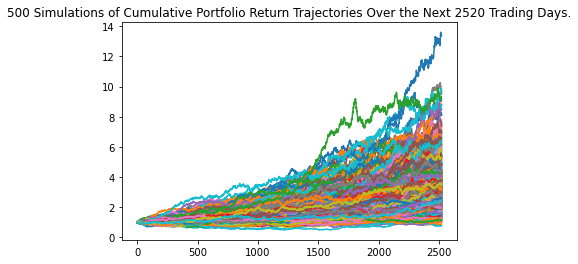

In [40]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten_year_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

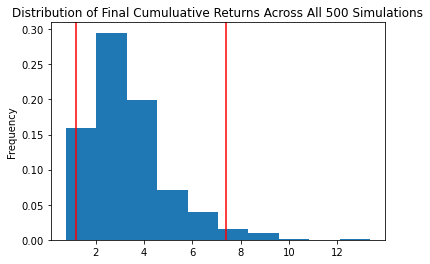

In [41]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_ten_year_sim.plot_distribution()

In [42]:
# Compute summary statistics from the simulated daily returns
simulated_returns_ten = {
    "mean": list(MC_ten_year_sim.simulated_return.mean(axis=1)),
    "median": list(MC_ten_year_sim.simulated_return.median(axis=1)),
    "min": list(MC_ten_year_sim.simulated_return.min(axis=1)),
    "max": list(MC_ten_year_sim.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_ten = pd.DataFrame(simulated_returns_ten)

# Display data
df_simulated_returns_ten.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000456,1.000518,0.978258,1.026552
2,1.001530,1.001961,0.966473,1.034847
3,1.001842,1.003088,0.958901,1.036009
4,1.001756,1.002965,0.953963,1.056093


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Portfolio Over the Next 10 Years'}>

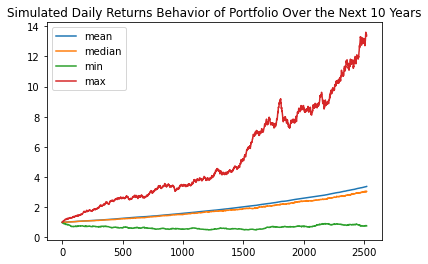

In [43]:
df_simulated_returns_ten.plot(title="Simulated Daily Returns Behavior of Portfolio Over the Next 10 Years")

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_year_tbl = MC_ten_year_sim.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(ten_year_tbl)

count           500.000000
mean              3.379445
std               1.647651
min               0.765494
25%               2.253608
50%               3.053461
75%               4.078382
max              13.367277
95% CI Lower      1.194910
95% CI Upper      7.416787
Name: 2520, dtype: float64


In [45]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(ten_year_tbl[8]*initial_investment_ten,2)
ci_upper_ten = round(ten_year_tbl[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71694.61 and $445007.21
